<a href="https://colab.research.google.com/github/aanis/twitter/blob/master/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [0]:
consumer_key= 
consumer_secret= 
access_token= 
access_token_secret= 

In [0]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [0]:
def remove_url(txt):

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

search_term = "#australia+fires -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-01-01').items(1000)


tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [0]:

sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]
(-0.06666666666666665,
 TextBlob("Australian fires are ravaging the planet"))

(-0.06666666666666665, TextBlob("Australian fires are ravaging the planet"))

In [0]:

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.033333333333333326,
 'Unknown facts about coronavirus infection The main source is Australia not China Those fires were not wast']

In [0]:

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.033333,Unknown facts about coronavirus infection The ...
1,0.000000,Our hearts go out to those in Australia Austra...
2,-0.500000,FlashbackFriday The BlackSaturday bush fires i...
3,0.000000,We had recent fires that burned out a lot of n...
4,-0.025000,SamKimpton JoelGoldenberg1 JohnCleese Burnt fa...


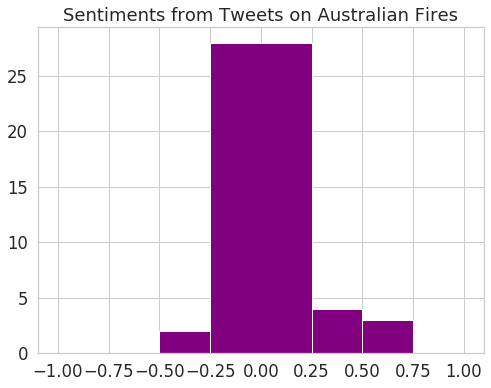

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Australian Fires")
plt.show()